# SED Analysis

In this example, we will import and read a table of flux measurements for AU Mic and fit a stellar spectral model to the Spectral Energy Distribution (SED). This example uses 'chromatic' to access PHOENIX spectra.

In [1]:
from chromatic import get_phoenix_photons
from expecto import get_spectrum
from jax import numpy as jnp
from fleck.jax import ActiveStar, bin_spectrum
import astropy
from median_bin import median_bin
import numpy as np

Let's read in the SED table:

In [2]:
from astropy.table import Table
table = Table.read('AUMic_vizier_votable.vot', format='votable')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import astropy.constants as c

In [4]:
_flux = table['sed_flux']
_err = table['sed_eflux']
frequency = table['sed_freq'] * 1e9 / u.s
wavelength = frequency.to(u.um, u.spectral())

In [5]:
sorted = np.argsort(wavelength)

wave = wavelength[sorted]
flux = _flux[sorted]
err = _err[sorted]

Sort the data by wavelength

In [20]:
notnanflux = ~np.isnan(flux)

_flux = flux[ notnanflux & (flux.value < 100) & (wave.value<5.0) ]
_err = err[ notnanflux & (flux.value < 100) & (wave.value<5.0) ]
_wave = wave[ notnanflux & (flux.value < 100) & (wave.value<5.0) ]

In [23]:
wavelengths, fluxes, errors = median_bin(_wave.value, _flux.value, _err.value,gap_definition=0.00000000001)

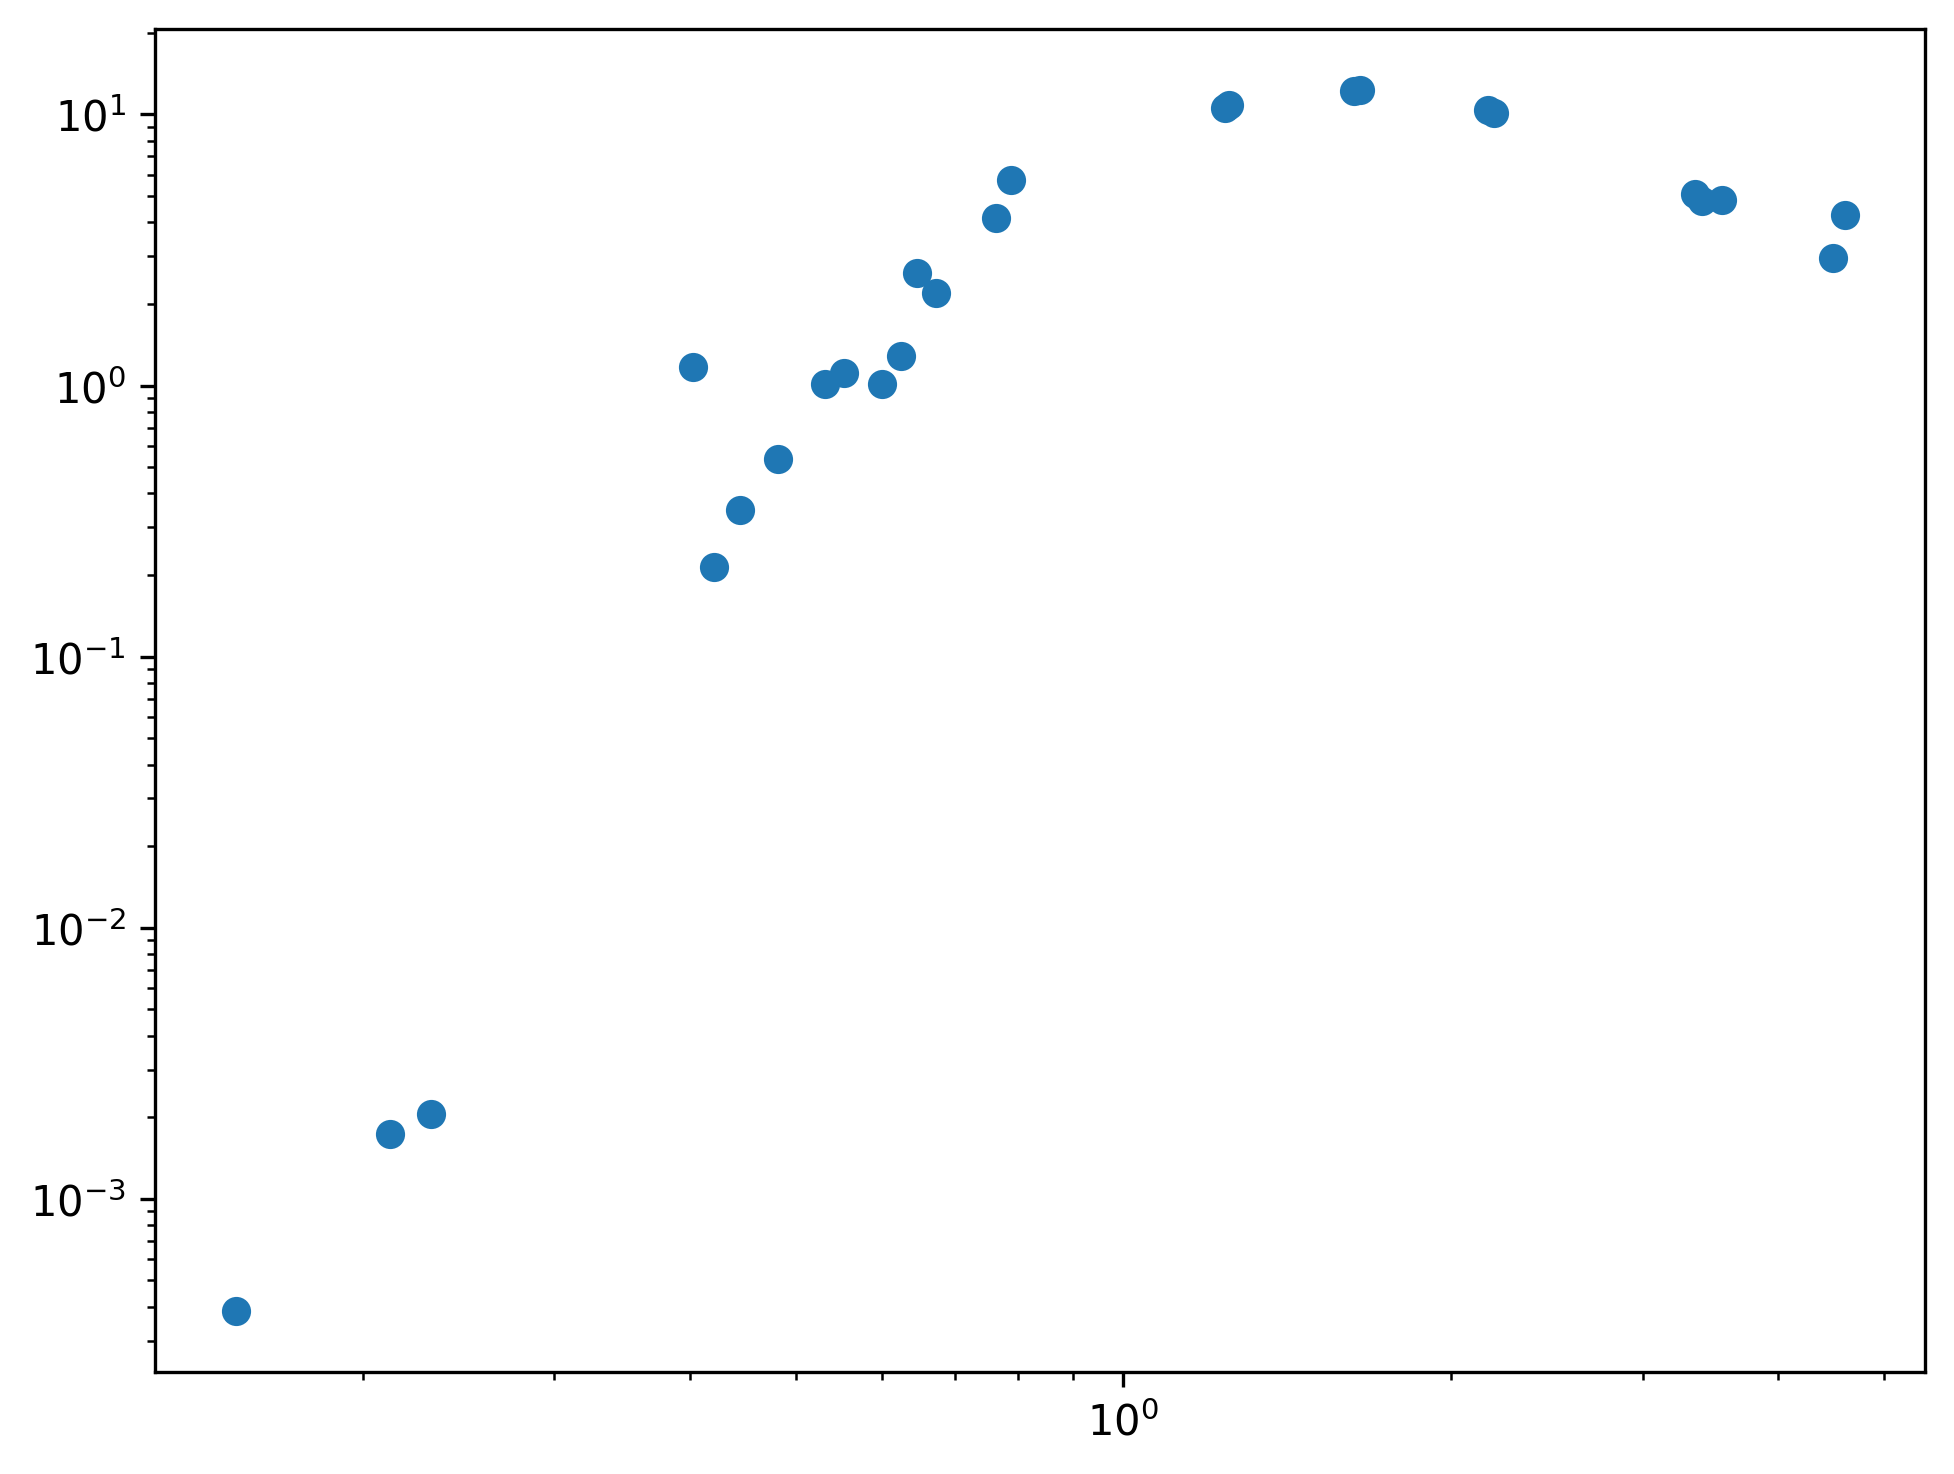

In [24]:
plt.errorbar(wavelengths, fluxes, errors, fmt='o')
plt.yscale('log')
plt.xscale('log')

In [25]:
model = get_phoenix_photons(temperature = 3900 * u.K,
                            wavelength = wavelengths*u.micron)

In [28]:
model_wave = model[0]
model_flux = model[1]